In [42]:
# IMPORTING THE PACKAGES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
# LOADING THE TRAINING DATASET
train = pd.read_csv('train.tsv',sep ='\t')
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [44]:
# LOADING THE TEST DATASET
test = pd.read_csv('test.tsv',sep ='\t')
test.head(5)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


Text(0, 0.5, 'Number of Reviews')

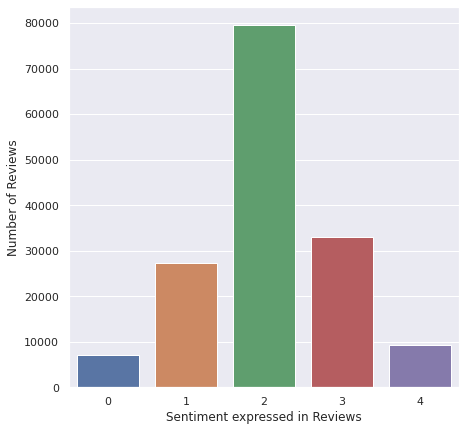

In [45]:
# COUNT OF PHRASES BASED ON SENTIMENTS
sns.countplot(train['Sentiment'])
plt.xlabel('Sentiment expressed in Reviews')
plt.ylabel('Number of Reviews')

In [46]:
# SETTING SENTIMENT LABELS
def label(train):
        if train['Sentiment'] == 0:
            return 'negative'
        elif train['Sentiment'] == 1:
            return 'somewhat negative'
        elif train['Sentiment']==2:
            return 'neutral'
        elif train['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'

train['Label'] = train.apply(label,axis=1)
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment,Label
0,1,1,A series of escapades demonstrating the adage ...,1,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,2,neutral
2,3,1,A series,2,neutral
3,4,1,A,2,neutral
4,5,1,series,2,neutral


In [47]:
# CHECKING FOR NULL VALUES
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Label         0
dtype: int64

In [48]:
# TF_IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

In [49]:
# SPLITTING TRAINING AND TEST DATA
from sklearn.model_selection import train_test_split
X = train_vectorized
y = train['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [50]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logreg = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_pred, y_test)
lgacc = acc
print('\tAccuracy: ', acc)
print('\nClassification Report')
print(classification_report(y_test, y_pred))

	Accuracy:  0.6253150497671836

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.16      0.26      2113
           1       0.56      0.32      0.40      8189
           2       0.64      0.91      0.75     23949
           3       0.59      0.41      0.48      9790
           4       0.67      0.20      0.31      2777

    accuracy                           0.63     46818
   macro avg       0.62      0.40      0.44     46818
weighted avg       0.62      0.63      0.59     46818



In [51]:
# K-NEAREST NEIGHBOUR CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
knnacc = acc
print('\tAccuracy: ', acc)
print('\nClassification Report')
print(classification_report(y_test, y_pred))

	Accuracy:  0.5859071297364261

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.39      0.38      2113
           1       0.45      0.51      0.48      8189
           2       0.69      0.71      0.70     23949
           3       0.52      0.46      0.49      9790
           4       0.49      0.30      0.37      2777

    accuracy                           0.59     46818
   macro avg       0.50      0.47      0.48     46818
weighted avg       0.58      0.59      0.58     46818



In [52]:
# LINEAR SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
svc = LinearSVC(multi_class='ovr', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred, y_test)
svcacc = acc
print('\tAccuracy: ', acc)
print('\nClassification Report')
print(classification_report(y_test, y_pred))

	Accuracy:  0.6474219317356572

Classification Report
              precision    recall  f1-score   support

           0       0.49      0.37      0.42      2113
           1       0.55      0.49      0.52      8189
           2       0.72      0.81      0.76     23949
           3       0.57      0.51      0.54      9790
           4       0.52      0.40      0.45      2777

    accuracy                           0.65     46818
   macro avg       0.57      0.52      0.54     46818
weighted avg       0.64      0.65      0.64     46818



In [53]:
# MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
nbacc = acc
print('\tAccuracy:', acc)
print('\nClassification Report')
print(classification_report(y_test, y_pred))

	Accuracy: 0.5947498825238157

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.02      0.04      2113
           1       0.56      0.22      0.31      8189
           2       0.60      0.94      0.73     23949
           3       0.58      0.35      0.44      9790
           4       0.73      0.04      0.08      2777

    accuracy                           0.59     46818
   macro avg       0.62      0.31      0.32     46818
weighted avg       0.60      0.59      0.53     46818



In [54]:
# PREDICTING TEST SET USING LOGISTIC REGRESSION
logreg_pred = logreg.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = logreg_pred
results.to_csv('Results (Logistic Regression).csv',index=False)

In [55]:
# PREDICTING TEST SET USING KNN
knn_pred = knn.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = knn_pred
results.to_csv('Results (KNN).csv',index=False)

In [56]:
# PREDICTING TEST SET USING LINEAR SVC
svc_pred = svc.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = svc_pred
results.to_csv('Results (Linear SVC).csv',index=False)

In [57]:
# PREDICTING TEST SET USING MULTINOMIAL NAIVE BAYES
nb_pred = nb.predict(test_vectorized)
results = pd.DataFrame()
results['PhraseId'] = test.PhraseId
results['Sentiment'] = nb_pred
results.to_csv('Results (Multinomial NB).csv',index=False)

The accuracy score achieved using Logistic Regression is: 0.6253150497671836 %
The accuracy score achieved using KNN is: 0.5859071297364261 %
The accuracy score achieved using Linear SVC is: 0.6474219317356572 %
The accuracy score achieved using Multinomial NB is: 0.5947498825238157 %


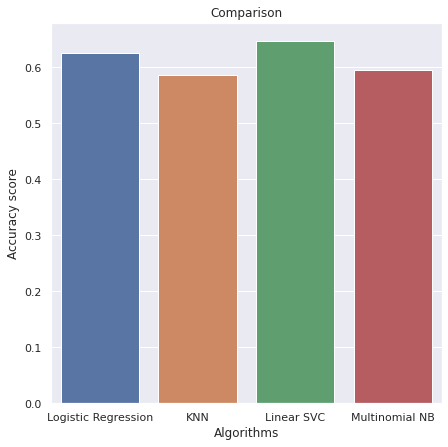

In [58]:
# COMPARING ALL THE MODELS
scores = [lgacc,knnacc,svcacc,nbacc]
algorithms = ["Logistic Regression","KNN","Linear SVC","Multinomial NB"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
sns.set(rc={'figure.figsize':(7,7)})
plt.title("Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)